# Dataset exploration
## Dataset Unzipping

In [1]:
import zipfile
import os

zip_dataset_path = '../data/raw/filtered_paranmt.zip'
extracted_dir = '../data/interim/'

if not os.path.exists(extracted_dir):
    with zipfile.ZipFile(zip_dataset_path, 'r') as zip_ref:
        # Extract all the contents of the zip file to the specified directory
        zip_ref.extractall(extracted_dir)

## Reading .tsv file

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk

tsv_path = extracted_dir + 'filtered.tsv'

dataset = pd.read_csv(tsv_path, sep='\t', index_col=0)

print(len(dataset))
dataset.head()

577777


,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


## Let's have a look at changes after transformation
### Toxicity level
> As we can see, 2/5 text became worse after translation. We can solve this issue by simple swapping of ref text and target text for proper training.

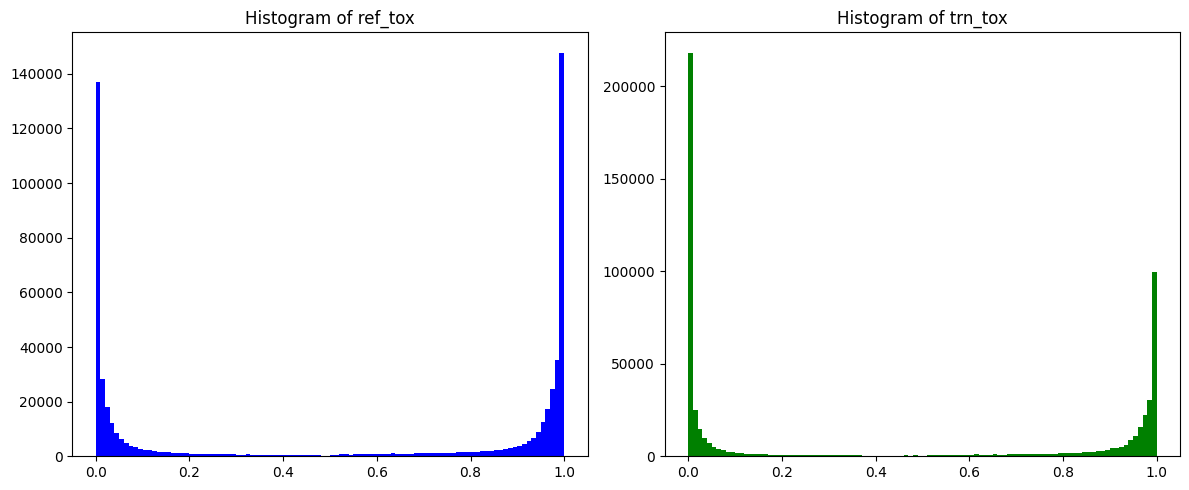

In [3]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(dataset['ref_tox'], bins=100, color='blue')
ax2.hist(dataset['trn_tox'], bins=100, color='green')

ax1.set_title('Histogram of ref_tox')
ax2.set_title('Histogram of trn_tox')

plt.tight_layout()
plt.show()

In [4]:
print(len(dataset[dataset['ref_tox'] <= dataset['trn_tox']]))
dataset[dataset['ref_tox'] <= dataset['trn_tox']]

258635


,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348
...,...,...,...,...,...,...
577764,"Carry on, Chief.","execute him, Chief.",0.701188,0.150000,0.000092,0.998043
577765,"Oh, what a tongue that woman's got, but she's ...","the woman has a sharp tongue, but she's nice.",0.794363,0.220339,0.210133,0.865461
577766,Tell the doctor I'm dropping a deuce.,tell the doctor I'm going to throw the poo.,0.646018,0.136364,0.000456,0.874277
577772,You didn't know that Estelle had stolen some f...,you didn't know that Estelle stole your fish f...,0.870322,0.030769,0.000121,0.949143


> And these pairs will be leaved as they are. But we will use some equation such as $|reftox-trntox|>diff$, where $diff$ is sufficient difference between levels for preventing toxic translations.

In [5]:
print(len(dataset[dataset['ref_tox'] > dataset['trn_tox']]))
dataset[dataset['ref_tox'] > dataset['trn_tox']]

319142


,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
5,I'm not gonna have a child... ...with the same...,I'm not going to breed kids with a genetic dis...,0.703185,0.206522,0.950956,0.035846
6,"They're all laughing at us, so we'll kick your...",they're laughing at us. We'll show you.,0.618866,0.230769,0.999492,0.000131
7,Maine was very short on black people back then.,there wasn't much black in Maine then.,0.720482,0.187500,0.963680,0.148710
11,"So now their spirits are cursed, walking back ...","their souls are cursed, they guard the paths, ...",0.755883,0.013245,0.842509,0.143992
13,"Come on, Cal, leave that shit alone.","come on, Cal, put it down.",0.660481,0.270270,0.999637,0.000279
...,...,...,...,...,...,...
577770,I am so crazy nuts about you guys.,I'm so crazy about you guys.,0.934512,0.171429,0.973442,0.000709
577771,"I thought American men were bad enough, but no...","an American man is worth nothing, but for you,...",0.671444,0.371212,0.999624,0.035941
577773,It'il suck the life out of you!,you'd be sucked out of your life!,0.722897,0.058824,0.996124,0.215794
577774,"I can't fuckin' take that, bruv.",I really can't take this.,0.617511,0.212121,0.984538,0.000049


In [6]:
diff = 0.9
print(len(dataset[abs(dataset['ref_tox'] - dataset['trn_tox']) >= diff]))
dataset[abs(dataset['ref_tox'] - dataset['trn_tox']) >= diff]

406504


,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348
5,I'm not gonna have a child... ...with the same...,I'm not going to breed kids with a genetic dis...,0.703185,0.206522,0.950956,0.035846
...,...,...,...,...,...,...
577771,"I thought American men were bad enough, but no...","an American man is worth nothing, but for you,...",0.671444,0.371212,0.999624,0.035941
577772,You didn't know that Estelle had stolen some f...,you didn't know that Estelle stole your fish f...,0.870322,0.030769,0.000121,0.949143
577774,"I can't fuckin' take that, bruv.",I really can't take this.,0.617511,0.212121,0.984538,0.000049
577775,They called me a fucking hero. The truth is I ...,"they said I was a hero, but I didn't care.",0.679613,0.358209,0.991945,0.000124


### Similarity
> I decided not to delete the data based on their similarity level. After some exploration I understood that (almost) all pair of sentences are the same in terms of semantics.

In [7]:
sim_lvl = 0.65
print(len(dataset[dataset['similarity'] < sim_lvl]))
dataset[dataset['similarity'] < sim_lvl]

86485


,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
6,"They're all laughing at us, so we'll kick your...",they're laughing at us. We'll show you.,0.618866,0.230769,0.999492,0.000131
14,So he's the Top dog.,he's the tallest son of a bitch.,0.611092,0.363636,0.000920,0.999639
34,"Now, I understand you got your grievances with...","I understand you don't have to cut your bills,...",0.612584,0.192982,0.999603,0.000051
35,"I'll rot in front of his cameras, on him.","it's all over him, right in front of their cam...",0.615810,0.250000,0.987824,0.000101
44,"He's ashamed of you, because your copybook is ...",he's ashamed of you because you have a blob in...,0.637603,0.051724,0.001172,0.906323
...,...,...,...,...,...,...
577738,We're all doommed.,we are all cursed!,0.611297,0.000000,0.001918,0.844721
577745,"I'm going to hit you in all directions, civil ...","I will go to you from all sides, in both civil...",0.644369,0.137931,0.967855,0.000068
577749,What the hell were you thinking?,what was that about?,0.624227,0.363636,0.965742,0.000045
577766,Tell the doctor I'm dropping a deuce.,tell the doctor I'm going to throw the poo.,0.646018,0.136364,0.000456,0.874277


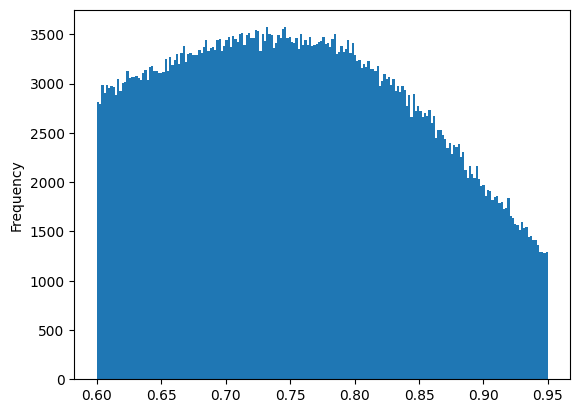

In [8]:
dataset['similarity'].plot.hist(bins=200)
plt.show()

### Length difference
> This column has not any reason to be counted as measure of translation quality. Therefore, just leave it

In [9]:
len_diff = 0.3
print(len(dataset[dataset['lenght_diff'] > len_diff]))
dataset[dataset['lenght_diff'] > len_diff]

75082


,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
14,So he's the Top dog.,he's the tallest son of a bitch.,0.611092,0.363636,0.000920,0.999639
22,"Real life starts the first time you fuck, kid.","boy, real life starts up first.",0.866697,0.319149,0.998222,0.000114
26,I like that shit.,I love it.,0.697344,0.388889,0.999594,0.000043
28,How is this not porn? This is porn that comes ...,and this doesn't feel like porn?,0.697579,0.365385,0.933948,0.009414
...,...,...,...,...,...,...
577742,"It's so simple, it's stupid.",it's quite simple.,0.723609,0.344828,0.999640,0.000053
577749,What the hell were you thinking?,what was that about?,0.624227,0.363636,0.965742,0.000045
577751,Because I've followed you for eight weeks now ...,"I followed you for eight weeks, and you ordere...",0.803549,0.357143,0.987531,0.000042
577771,"I thought American men were bad enough, but no...","an American man is worth nothing, but for you,...",0.671444,0.371212,0.999624,0.035941


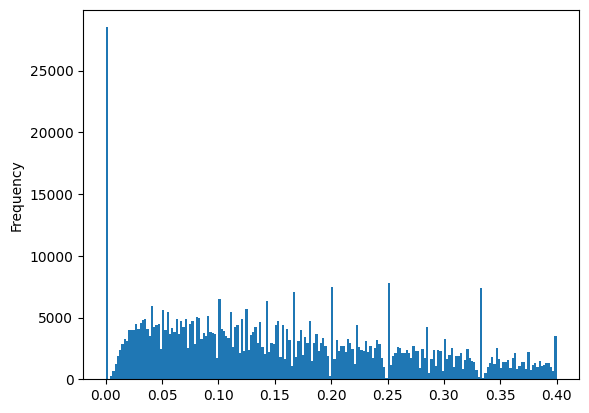

In [10]:
dataset['lenght_diff'].plot.hist(bins=200)
plt.show()

In [11]:
from nltk.tokenize import word_tokenize

nltk.download('punkt', quiet=True)

dataset['tokenized_reference'] = dataset['reference'].apply(lambda text: word_tokenize(text))
dataset['tokenized_translation'] = dataset['translation'].apply(lambda text: word_tokenize(text))

In [12]:
all_sent = dataset['tokenized_translation'].tolist() + dataset['tokenized_reference'].tolist()
all_words = [word for sent in all_sent for word in sent]

In [13]:
print(f'Number of all words: {len(all_words)}\nNumber of unique words: {len(set(all_words))}')

Number of all words: 14344649
Number of unique words: 150786


In [14]:
from collections import Counter

token_counts = Counter(all_words)
tokens = list(token_counts.keys())
counts = list(token_counts.values())

In [15]:
number_counts = {}
for number in token_counts.values():
    if number in number_counts:
        number_counts[number] += 1
    else:
        number_counts[number] = 1

In [16]:
# Find the maximum number in the dictionary
max_number = max(token_counts.values())

# Create lists for the numbers and their corresponding counts
numbers = list(range(1, max_number + 1))
counts = [number_counts.get(number, 0) for number in numbers]

In [17]:
cnt= 0
for word in token_counts:
    if token_counts[word] <= 5:
        print(word, token_counts[word])
        cnt += 1

Alkar 4
neurotransmitter 2
'could 5
Opulent 1
bloodlust-starved 1
dabble 5
Natasho 2
mort 4
anti-rape 2
zinger 2
banzai 2
Cinque 1
payout 3
Slopey 2
Ratcliffe 4
Zando-Zans 2
Rogan 2
Clennam 4
monologue 5
restriction 4
Aitchi 2
camelia 1
Seòor 2
Tenente 4
lessee 1
finalists 3
Typ 1
paddled 5
Maret 1
pussy-at-the-station 2
chest. 3
marauders 5
Itioti 1
sabbath 3
lows 5
Strelnikov 2
Hewel 2
DSM 4
Tubman 3
deglaze 2
rotations 2
conditional 4
Figgins 3
thousand-year-old 4
Vykuk 1
Pritkin 1
Essendon 2
thwarted 4
Valdon 4
Eunik 1
latinum 5
Crista 1
overdid 4
Madyna 1
bridegroom 4
plenary 3
skyeterriers 1
terriers 5
Salvadorans 5
Gibraltar 5
Freeborn 2
instantly. 1
Grosso 2
orangey 1
Fatties 2
blazers 3
80.years 1
DIOR 1
PRAGUE 5
sarin 5
schedules 4
SIGR 3
menion 3
drily 3
pi-show 1
novelties 2
Quinquin 2
double-price 1
cissies 1
avoiders 4
fiduciary 1
forebrain 5
sworth 2
Oos 1
CHIINV 2
Ladon 4
uppity-eyed 1
histeric 1
actualization 1
Arturo 5
Tolbert 3
inside. 3
capitulate 2
americano 5
fuck

### Tokens number

In [18]:
dataset['reference_words_len'] = dataset['tokenized_reference'].apply(lambda words: len(words))
dataset['translation_words_len'] = dataset['tokenized_translation'].apply(lambda words: len(words))

In [19]:
print('ref max word length', max(dataset['reference_words_len']))
print('trn max word length', max(dataset['translation_words_len']))

ref max word length 271
trn max word length 200


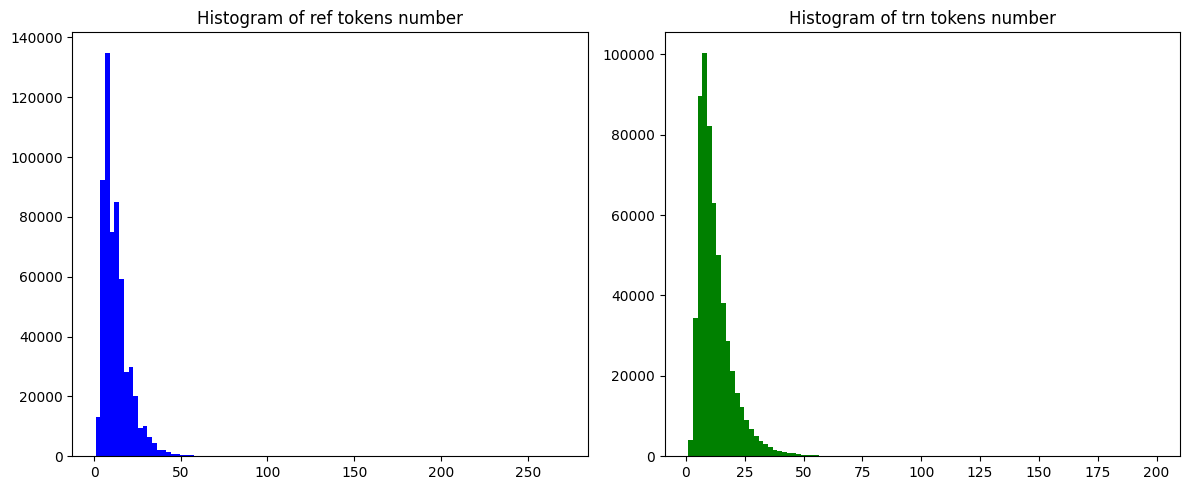

In [20]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(dataset['reference_words_len'], bins=100, color='blue')
ax2.hist(dataset['translation_words_len'], bins=100, color='green')

ax1.set_title('Histogram of ref tokens number')
ax2.set_title('Histogram of trn tokens number')

plt.tight_layout()
plt.show()

> I will remove all content which is longer than 50 tokens.